# Visualização

In [1]:
import pandas as pd
import numpy as np
import seaborn as srn
import matplotlib.pyplot as plt
srn.set()
%matplotlib inline

In [2]:
dataset = pd.read_csv('Bases de dados/census.csv')
print(dataset.shape)
dataset.head()

(32561, 15)


,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Gráfico de dispersão

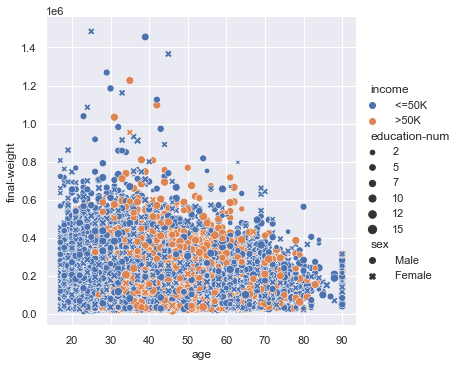

In [6]:
srn.relplot(x='age', 
            y='final-weight', 
            data=dataset,
            hue='income', 
            style='sex', 
            size='education-num');

## Gráfico de barra e setor (pizza)

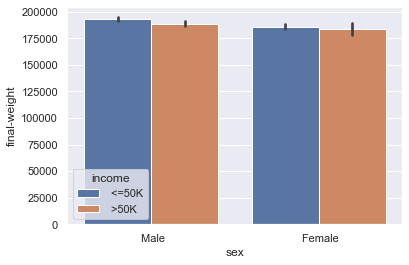

In [11]:
srn.barplot(x='sex', 
            y='final-weight', 
            data=dataset, 
            hue='income');

In [12]:
dados_agrupados = dataset.groupby(['income'])['education-num'].sum()
dados_agrupados

income
 <=50K    237190
 >50K      91047
Name: education-num, dtype: int64

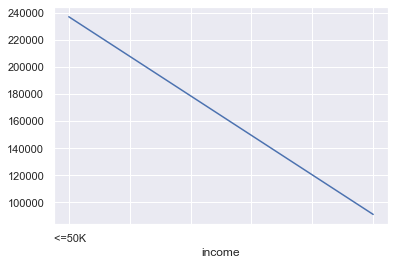

In [14]:
dados_agrupados.plot();

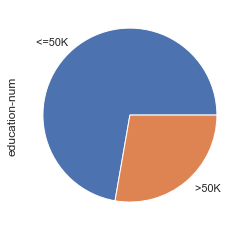

In [15]:
dados_agrupados.plot.pie();

## Gráfico de linha

In [18]:
# dados ao longo do tempo
vendas = {'mes': np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]), 
          'valor': np.array([100, 200, 120, 300, 500, 198, 200, 209, 130, 500, 300, 120])}
vendas = pd.DataFrame(vendas)
vendas.head()

,mes,valor
0,1,100
1,2,200
2,3,120
3,4,300
4,5,500


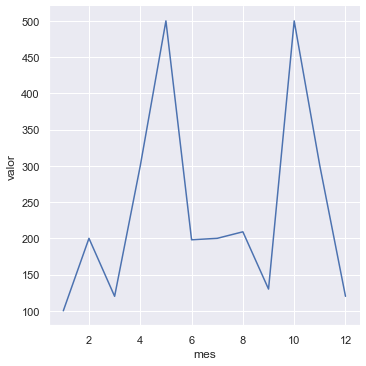

In [19]:
srn.relplot(x='mes', 
            y='valor', 
            kind='line', 
            data=vendas);

## Boxplot

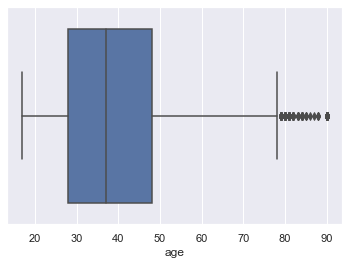

In [24]:
srn.boxplot(x=dataset['age']);

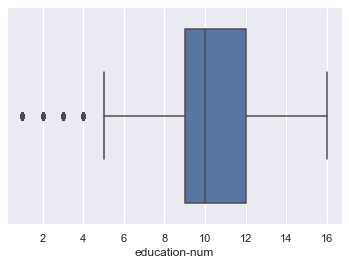

In [27]:
srn.boxplot(x=dataset['education-num']);

In [28]:
dataset2 = dataset.iloc[:, [0, 4, 12]]
dataset2.head()

,age,education-num,hour-per-week
0,39,13,40
1,50,13,13
2,38,9,40
3,53,7,40
4,28,13,40


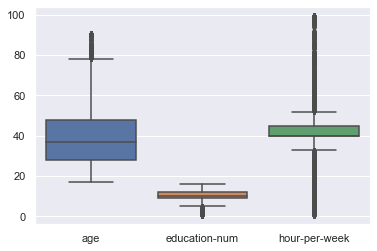

In [29]:
srn.boxplot(data=dataset2);

## Gráficos com atributos categóricos

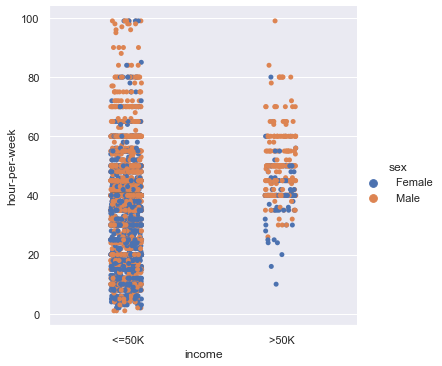

In [36]:
srn.catplot(data=dataset.query('age < 30'), 
            x='income', 
            y='hour-per-week', 
            hue='sex');

## Subgráficos

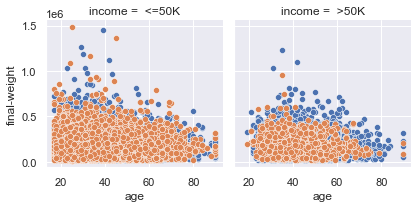

In [40]:
q = srn.FacetGrid(dataset, col='income', hue='sex');
q.map(srn.scatterplot, 'age', 'final-weight');

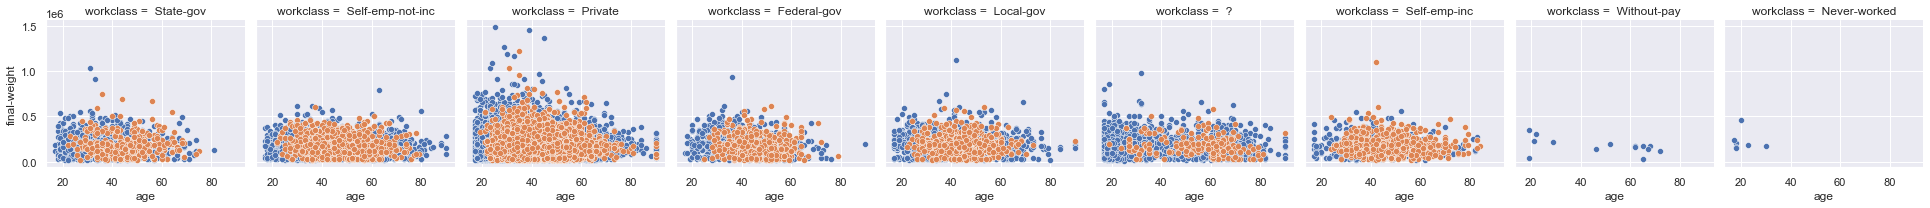

In [42]:
q = srn.FacetGrid(dataset, col='workclass', hue='income');
q.map(srn.scatterplot, 'age', 'final-weight');

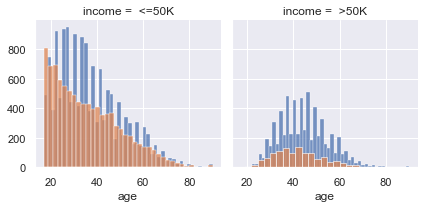

In [45]:
q = srn.FacetGrid(dataset, col='income', hue='sex');
q.map(srn.histplot, 'age');

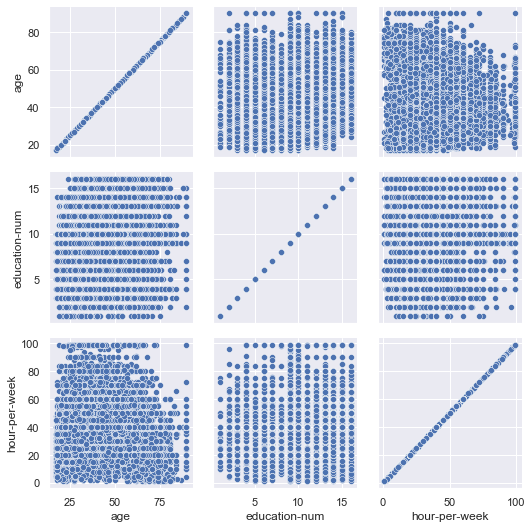

In [48]:
g = srn.PairGrid(dataset2)
g.map(srn.scatterplot)

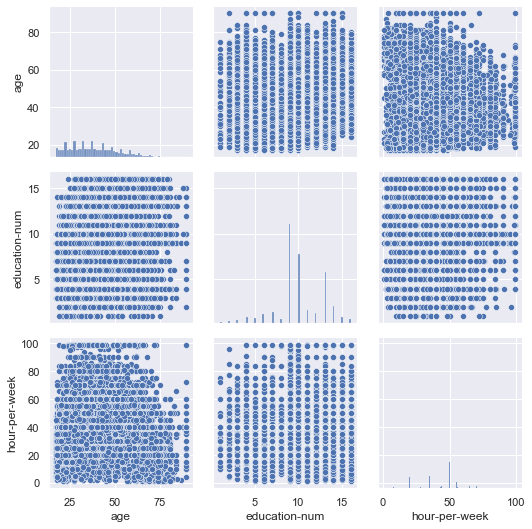

In [50]:
g = srn.PairGrid(dataset2)
g.map_diag(srn.histplot)
g.map_offdiag(srn.scatterplot)

## Mapa com Latitude e Longitude

In [55]:
#!apt install libgeos-3.5.0
#!apt install libgeos-dev
#!pip install https://github.com/matplotlib/basemap/archive/master.zip

In [58]:
#!python -m pip install basemap

In [57]:
from mpl_toolkits.basemap import Basemap

In [51]:
df = pd.read_csv('Bases de dados/house_prices.csv')
print(df.shape)
df.head()

(21613, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
